In [ ]:
# example of loading the mnist dataset
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam

from keras.preprocessing.image import load_img, img_to_array

In [ ]:
(trainX, trainY), (testX, testY) = mnist.load_data()
print(trainX.shape)

(60000, 28, 28)


8


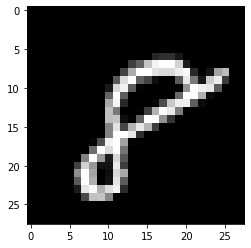

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
from matplotlib import pyplot as plt

%matplotlib inline
print(trainY[-1])
plt.imshow(trainX[-1], cmap = 'gray')
plt.show()
trainY = to_categorical(trainY)
print(trainY[-1])

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = Adam(learning_rate=0.01)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	flag = 0
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		if flag == 0:
			model.summary()
		flag = 1
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		model.fit(trainX, trainY, epochs=1, batch_size=32, validation_data=(testX, testY), verbose=1)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=1)
		print('> %.3f' % (acc * 100.0))

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	evaluate_model(trainX, trainY)

In [ ]:
# entry point, run the test harness
run_test_harness()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
!wget -O 'test.png' https://machinelearningmastery.com/wp-content/uploads/2019/02/sample_image.png

--2022-07-01 10:14:29--  https://machinelearningmastery.com/wp-content/uploads/2019/02/sample_image.png
Resolving machinelearningmastery.com (machinelearningmastery.com)... 172.67.72.46, 104.26.1.148, 104.26.0.148, ...
Connecting to machinelearningmastery.com (machinelearningmastery.com)|172.67.72.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34970 (34K) [image/png]
Saving to: ‘test.png’

test.png            100%[===================>]  34.15K  --.-KB/s    in 0s      

2022-07-01 10:14:29 (109 MB/s) - ‘test.png’ saved [34970/34970]



In [ ]:
filename = 'test.png'
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [ ]:
from types import prepare_class
model = define_model()
trainX, trainY, testX, testY = load_dataset()
trainX, testX = prep_pixels(trainX, testX)
# fit model
model.fit(trainX, trainY, epochs=5, batch_size=32, verbose=1)
# save model
model.save('final_model.h5')


Epoch 1/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1728 - accuracy: 0.9478
Epoch 2/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1090 - accuracy: 0.9693
Epoch 3/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0969 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0964 - accuracy: 0.9742
Epoch 5/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0932 - accuracy: 0.9754


In [ ]:
model = load_model('final_model.h5')

In [ ]:
# predict the class
from numpy import argmax
img = load_image(filename)
predict_value = model.predict(img)
digit = argmax(predict_value)
print(digit)

7


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
